In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context(context = 'poster')

<h1 align="center">Exploratory Analysis for POP fMRI DCM Data: </h1>
<h3 align="center">Architecture Two - Model Six</h3>

<img src="supportFiles/model6.png">
*Pre-SMA VOI placed for illustrative purposes. Actual VOI center in verified MNI coordinates.

______
### Data IO

In [61]:
# Data path
data = './data/'

# Reading DCM paramter matrices for ModelTwo
a = pd.read_table(data + 'DCM_model6_data_A.txt') # intrinsic connectivity
b = pd.read_table(data + 'DCM_model6_data_B.txt') # modulatory effects of drive on connection
c = pd.read_table(data + 'DCM_model6_data_C.txt') # drives to regions

# Reading DDM parameters for behavioral data
ddm = pd.read_csv(data + 'POP_model3-2_VAT_params.csv')

# Reading WMC measures
wmc = pd.read_csv(data + 'POP_id_wm.csv')

# Reading POP task behavioral data
bx = pd.read_csv(data + 'POP Behavioral Summary - Python (SD).csv')

In [162]:
# Exclusion for subjects with more than (a) 10% total functional volumes OR (b) 3 mm of XYZ displacement, 
# as calculated by in ART
# Exclude: 16048, 27035

a = a[(a['Subject'] != 16048) & (a['Subject'] != 27035)]
b = b[(b['Subject'] != 16048) & (b['Subject'] != 27035)]
c = c[(c['Subject'] != 16048) & (c['Subject'] != 27035)]

ddm = ddm[(ddm['Subject'] != 16048) & (ddm['Subject'] != 27035)]

wmc = wmc[(wmc['Subject'] != 16048) & (wmc['Subject'] != 27035)]

bx = bx[(bx['Subject'] != 16048) & (bx['Subject'] != 27035)]

In [189]:
# Previewing df content
a.head()
a.shape
b.head()
b.shape
c.head()
c.shape

ddm.head()
ddm.shape

wmc.head()
wmc.shape

bx.head()
bx.shape

,Subject,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-GPI_RH,STN_RH-to-GPI_RH,GPI_RH-to-PRESMA_RH
1,16050,0.516415,0.229196,1.064135,0.235359,0.112775,0.426282,0.633393
2,16051,0.084763,-1.164152,-0.946481,0.025345,0.575090,-0.892561,-3.122668
3,16052,-0.093610,-0.442855,-0.035440,0.489000,0.346430,0.222445,0.338136
4,16053,-0.481382,0.216684,-1.187932,0.394263,-0.162276,0.723017,0.964956
5,16054,-0.200245,-0.194296,-0.371056,0.585607,-1.011558,0.492289,3.354646


(37, 8)

,Subject,CAUD_RH-to-GPI_RH-by-Information,STN_RH-to-GPI_RH-by-Incongruence
1,16050,-0.294444,0.137799
2,16051,0.105656,0.318380
3,16052,-0.165970,0.058302
4,16053,-0.009520,0.312419
5,16054,0.264312,-1.027606


(37, 3)

,Subject,Cues-to-IFG_RH,Arrows-to-PRESMA_RH
1,16050,0.268331,1.513445
2,16051,-0.340144,4.783598
3,16052,-0.977936,3.656504
4,16053,-0.317275,2.202649
5,16054,-1.224242,3.617023


(37, 3)

,Subject,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
1,16050,1.192783,3.417405,1.792829,3.208320,1.480833,3.786338,1.382813,2.143612,0.245273,0.267914
2,16051,1.005285,4.896075,1.333776,3.951237,1.257180,3.057926,1.737084,3.499277,0.233655,0.259014
3,16052,1.804825,3.283169,1.800410,3.257707,1.712263,3.587484,2.436187,3.393481,0.219707,0.265498
4,16053,1.427812,3.855500,1.552936,3.894774,1.434788,3.507232,1.793490,3.629197,0.246711,0.320006
5,16054,1.140799,3.848528,1.528017,3.482348,1.243586,3.278889,1.183723,2.497338,0.195082,0.225522


(41, 11)

,Subject,ospan
1,16050,68
2,16051,59
3,16052,75
4,16053,23
5,16054,62


(38, 2)

,Subject,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedInc.TACC,CuedCon.TACC,NCInc.TACC,NCCon.TACC,Inc.RT,Con.RT,Cued.RT,NC.RT
1,16049,564.800000,0.5,468.923077,0.466667,660.000,0.4,591.200000,0.500000,0.4750,95.876923,68.800000,0.785398,0.752040,0.684719,0.785398,612.400000,530.061538,516.861538,625.600000
2,16050,465.777778,1.0,406.413793,0.966667,542.625,0.8,458.400000,1.000000,0.9625,59.363985,84.225000,1.570796,1.387192,1.107149,1.570796,504.201389,432.406897,436.095785,500.512500
3,16051,362.300000,1.0,322.700000,1.000000,484.300,1.0,444.464286,0.933333,0.9750,39.600000,39.835714,1.570796,1.570796,1.570796,1.309639,423.300000,383.582143,342.500000,464.382143
4,16052,475.000000,1.0,482.655172,1.000000,606.100,1.0,500.533333,1.000000,1.0000,-7.655172,105.566667,1.570796,1.570796,1.570796,1.570796,540.550000,491.594253,478.827586,553.316667
5,16053,407.000000,1.0,425.833333,1.000000,540.600,1.0,513.896552,0.966667,0.9875,-18.833333,26.703448,1.570796,1.570796,1.570796,1.387192,473.800000,469.864942,416.416667,527.248276


(42, 20)

_____

# WMC
### DCM Matrix A: Intrinsic Connectivity

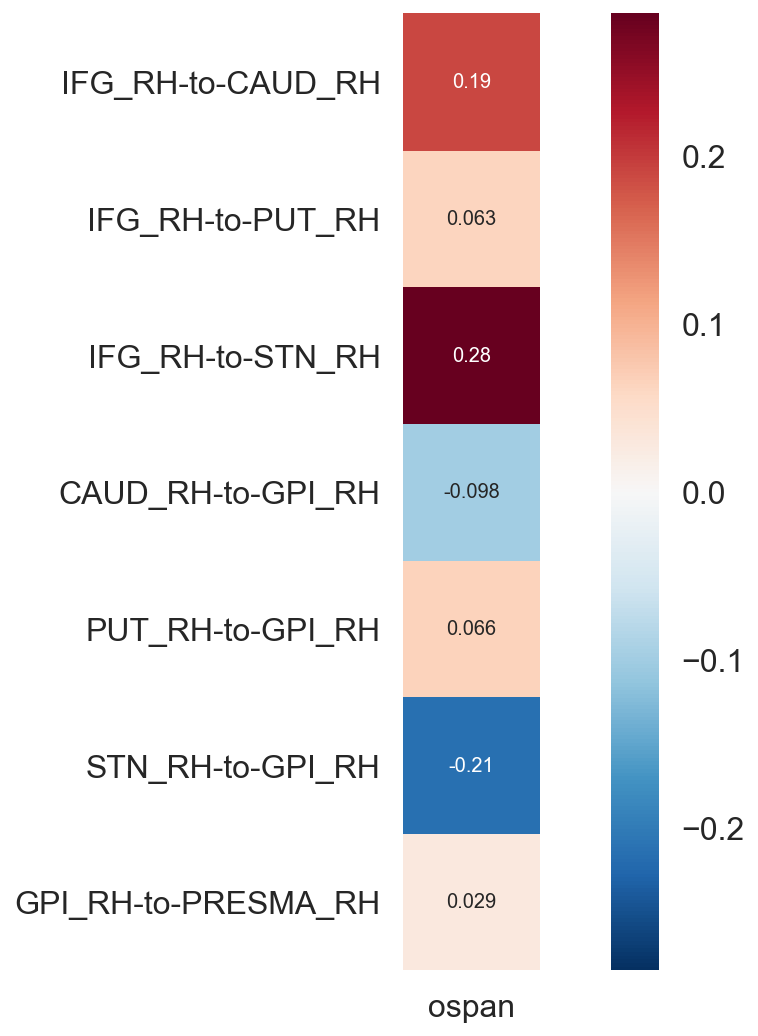

In [164]:
ax = sns.heatmap(a.merge(wmc).corr().iloc[1:8,-1:], 
                 annot=True, 
                 annot_kws={'size':10},
                 square=True)

In [165]:
aMelt = a.melt(id_vars=['Subject'])

aWMC = aMelt.merge(wmc, on='Subject')
aWMC.head()

,Subject,variable,value,ospan
0,16050,IFG_RH-to-CAUD_RH,0.516415,68
1,16050,IFG_RH-to-PUT_RH,0.229196,68
2,16050,IFG_RH-to-STN_RH,1.064135,68
3,16050,CAUD_RH-to-GPI_RH,0.235359,68
4,16050,PUT_RH-to-GPI_RH,0.112775,68


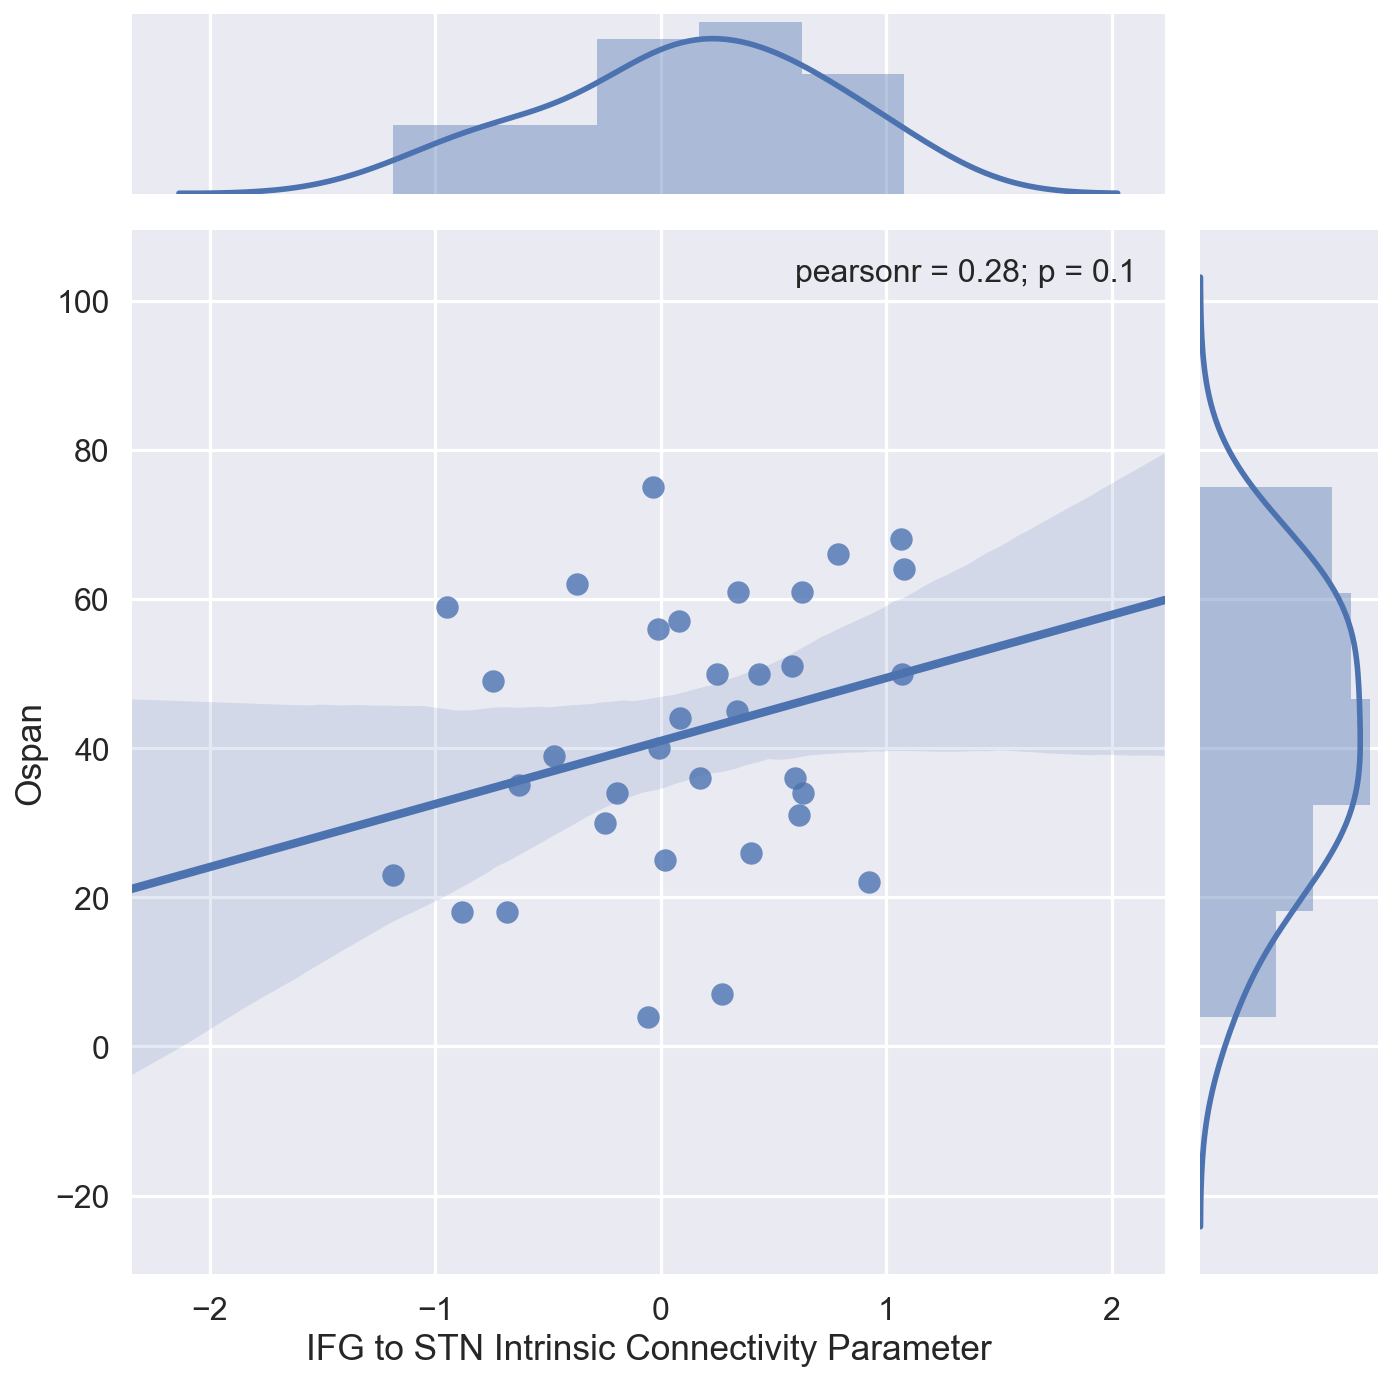

In [166]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=aWMC[aWMC['variable'] == 'IFG_RH-to-STN_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='IFG to STN Intrinsic Connectivity Parameter', ylabel='Ospan')

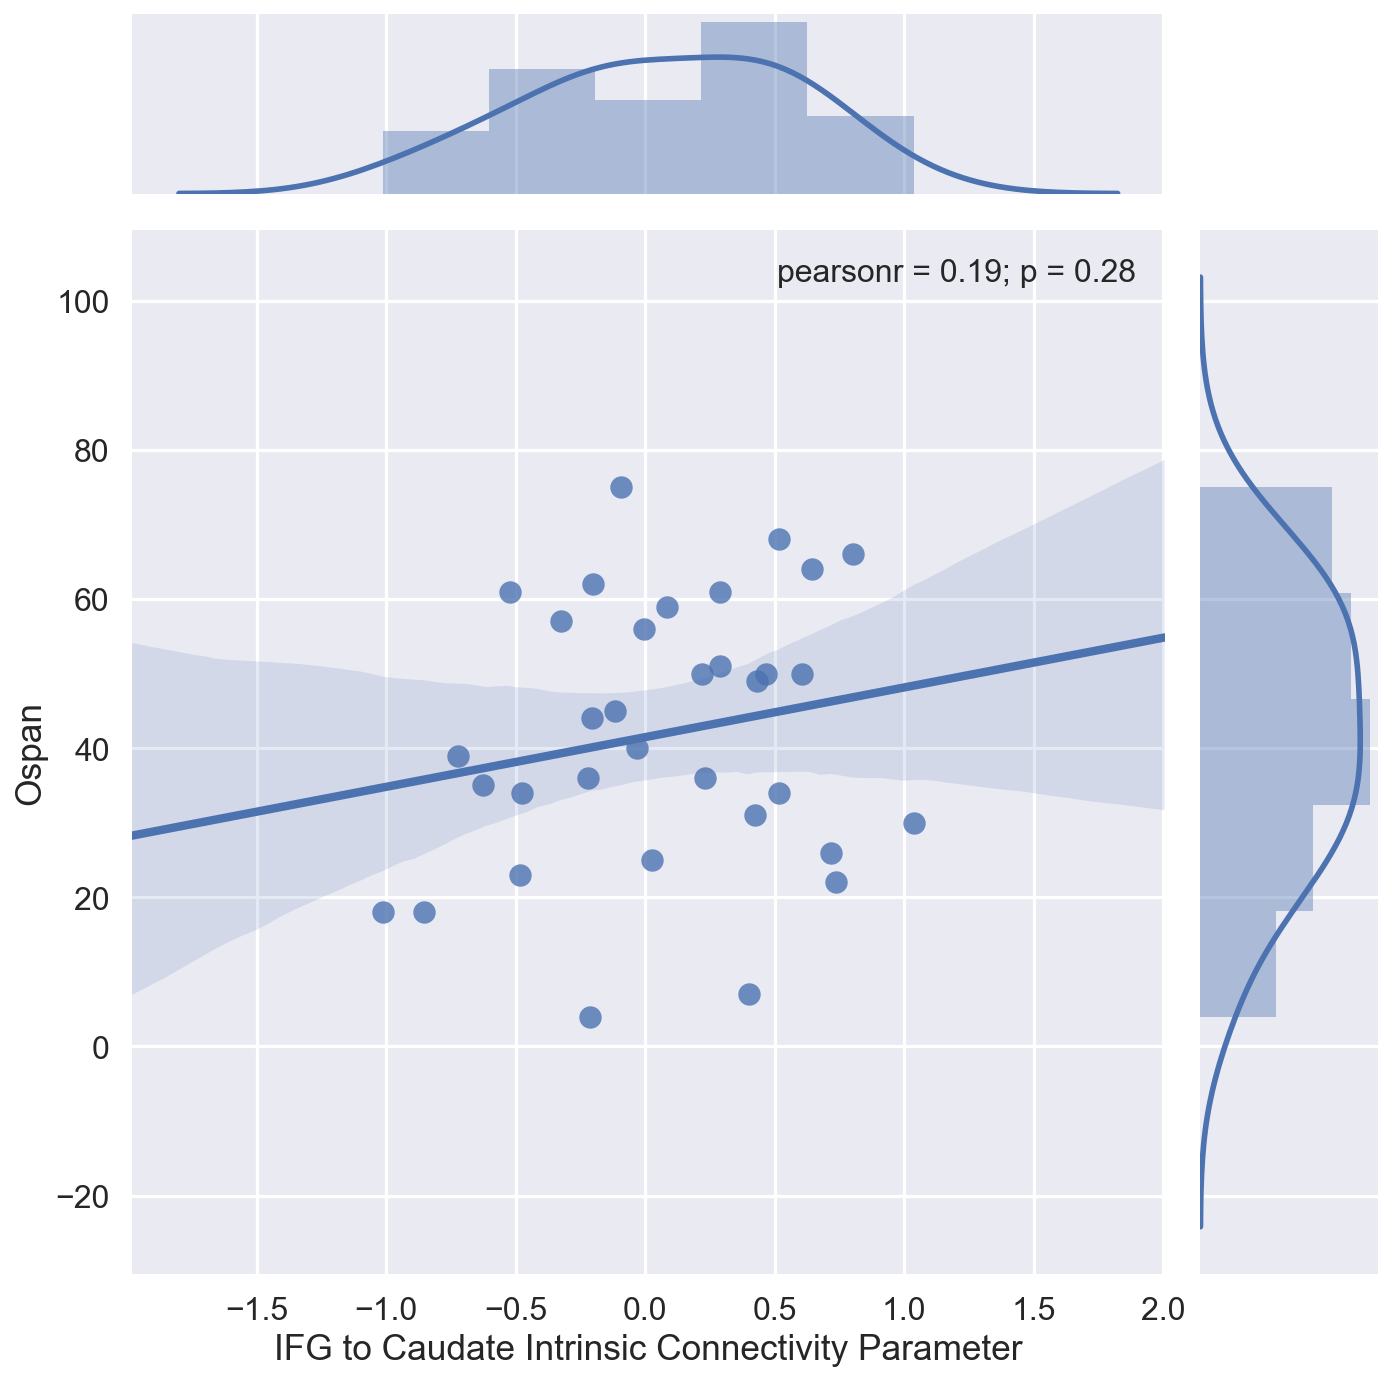

In [167]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=aWMC[aWMC['variable'] == 'IFG_RH-to-CAUD_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='IFG to Caudate Intrinsic Connectivity Parameter', ylabel='Ospan')

#### Interim Summary:
Intrinsic connectivity parameters in Model 6 were not significantly related to WMC, as indexed by Ospan. The IFG-to-STN intrinsic connectivity parameter, however, did approach significance (pearsonr = 0.29, p-val = 0.087)

### DCM Matrix B: Modulatory effects of drives on connections

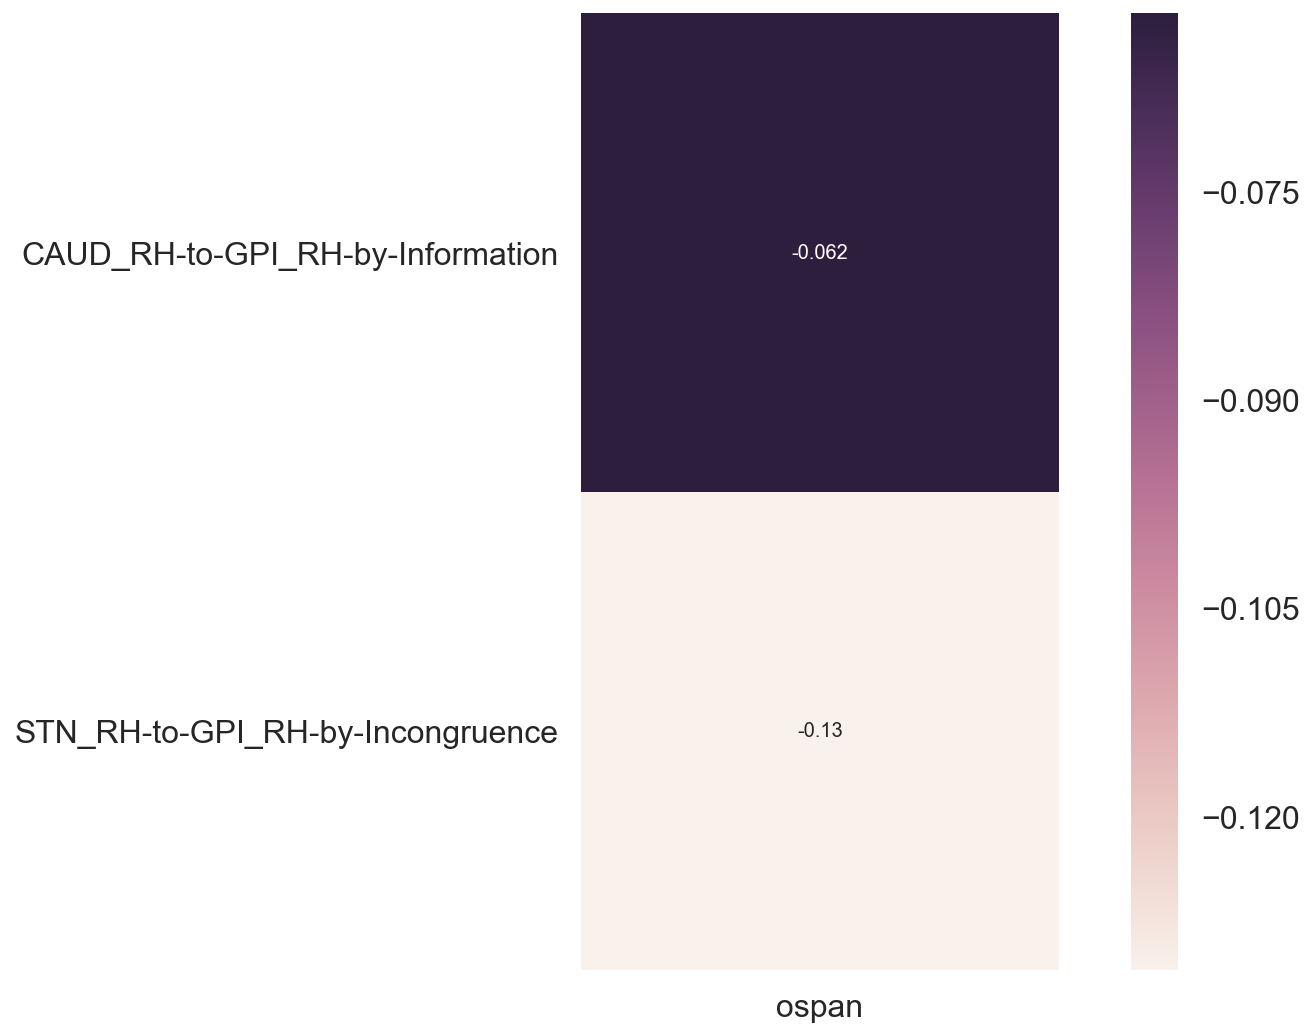

In [168]:
ax = sns.heatmap(b.merge(wmc).corr().iloc[1:3, -1:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

#### Interim Summary:
The paramters reflecting modulatory effects of drives on connections from Model 6 are not signficantly related to WMC, as indexed by Ospan. 

### DCM Matrix C: Effects of Drives on Regions

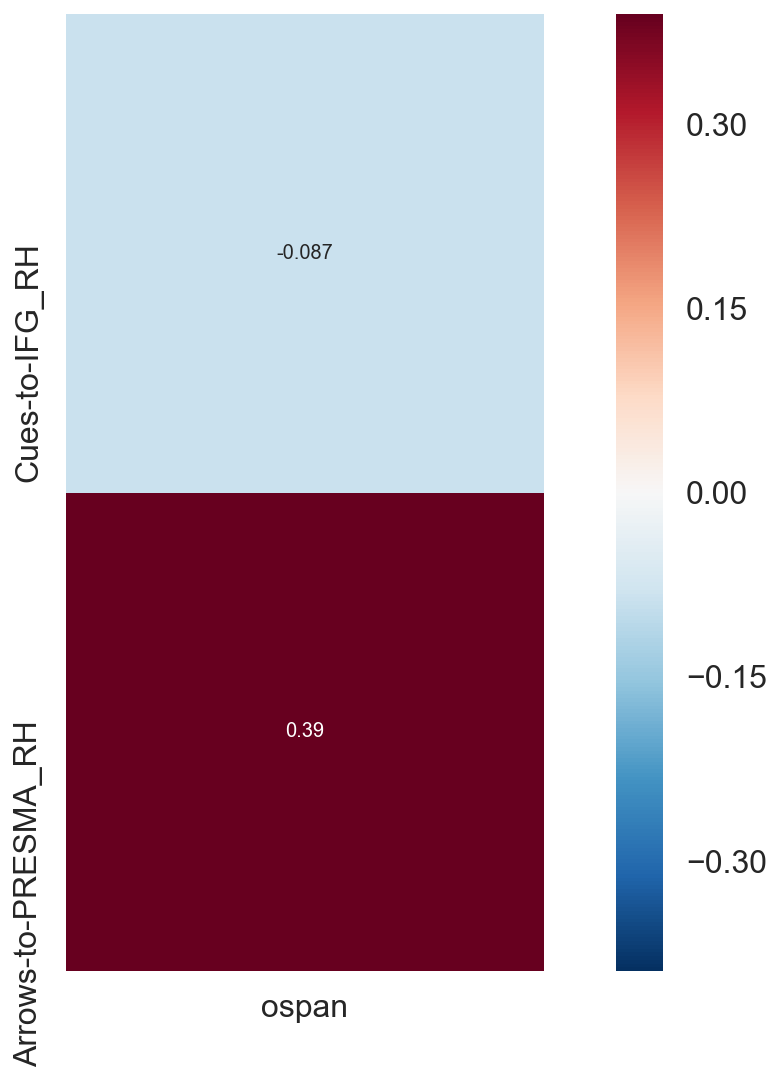

In [169]:
ax = sns.heatmap(c.merge(wmc).corr().iloc[1:3, -1:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [170]:
cMelt = c.melt(id_vars=['Subject'])

cWMC = cMelt.merge(wmc, on='Subject')
cWMC.head()

,Subject,variable,value,ospan
0,16050,Cues-to-IFG_RH,0.268331,68
1,16050,Arrows-to-PRESMA_RH,1.513445,68
2,16051,Cues-to-IFG_RH,-0.340144,59
3,16051,Arrows-to-PRESMA_RH,4.783598,59
4,16052,Cues-to-IFG_RH,-0.977936,75


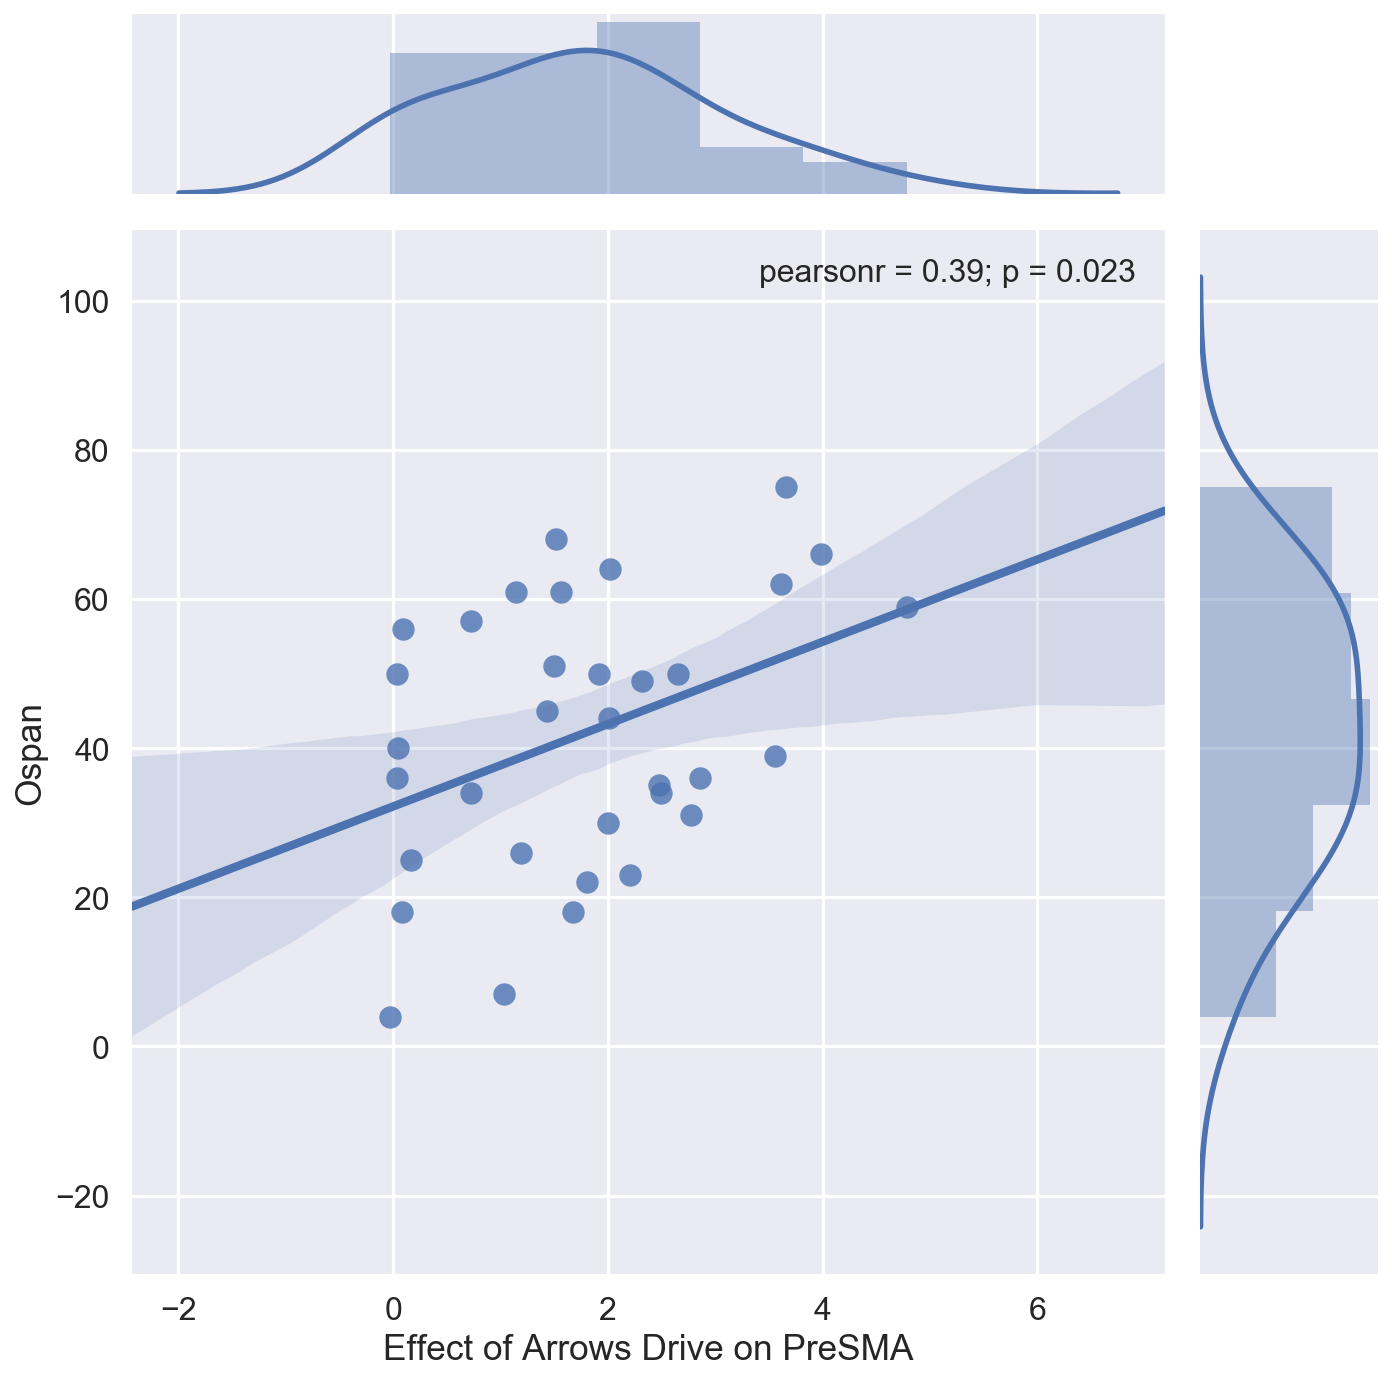

In [171]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=cWMC[cWMC['variable'] == 'Arrows-to-PRESMA_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='Effect of Arrows Drive on PreSMA', ylabel='Ospan')

#### Interim Summary:
The effect of arrows on the PreSMA VOI is significantly related to WMC. A higher effect of arrows on PreSMA positively predicts WMC (pearsonr = 0.42, p = 0.011).

_____

# Behavior
### DCM Matrix A: Intrinsic Connectivity

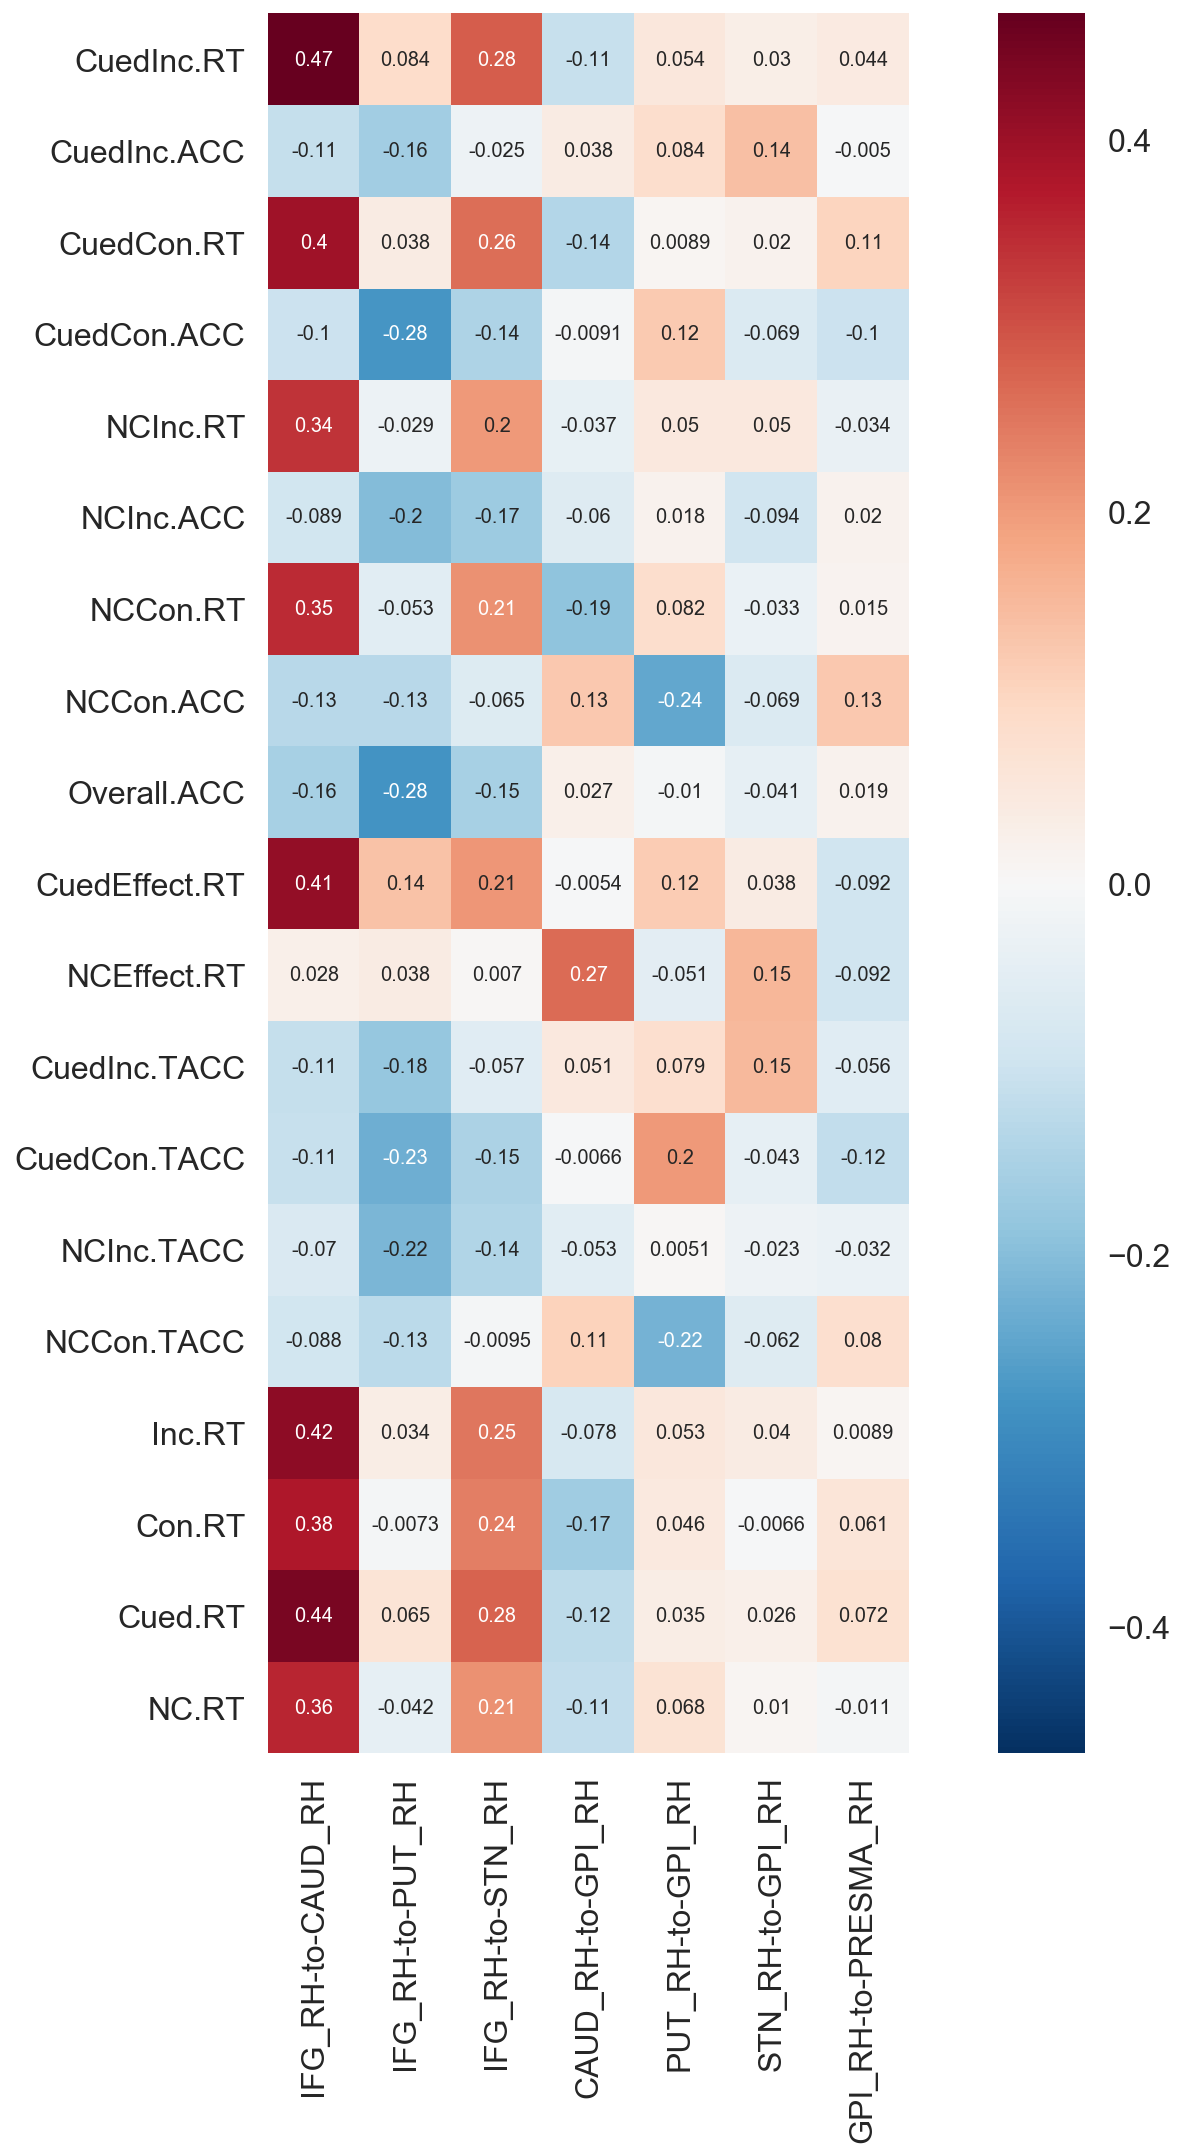

In [192]:
fig, ax = plt.subplots(figsize=(16,16)); 
sns.heatmap(a.merge(bx).corr().iloc[8:,1:8], 
                 annot=True, 
                 annot_kws={'size':10},
                 square=True);


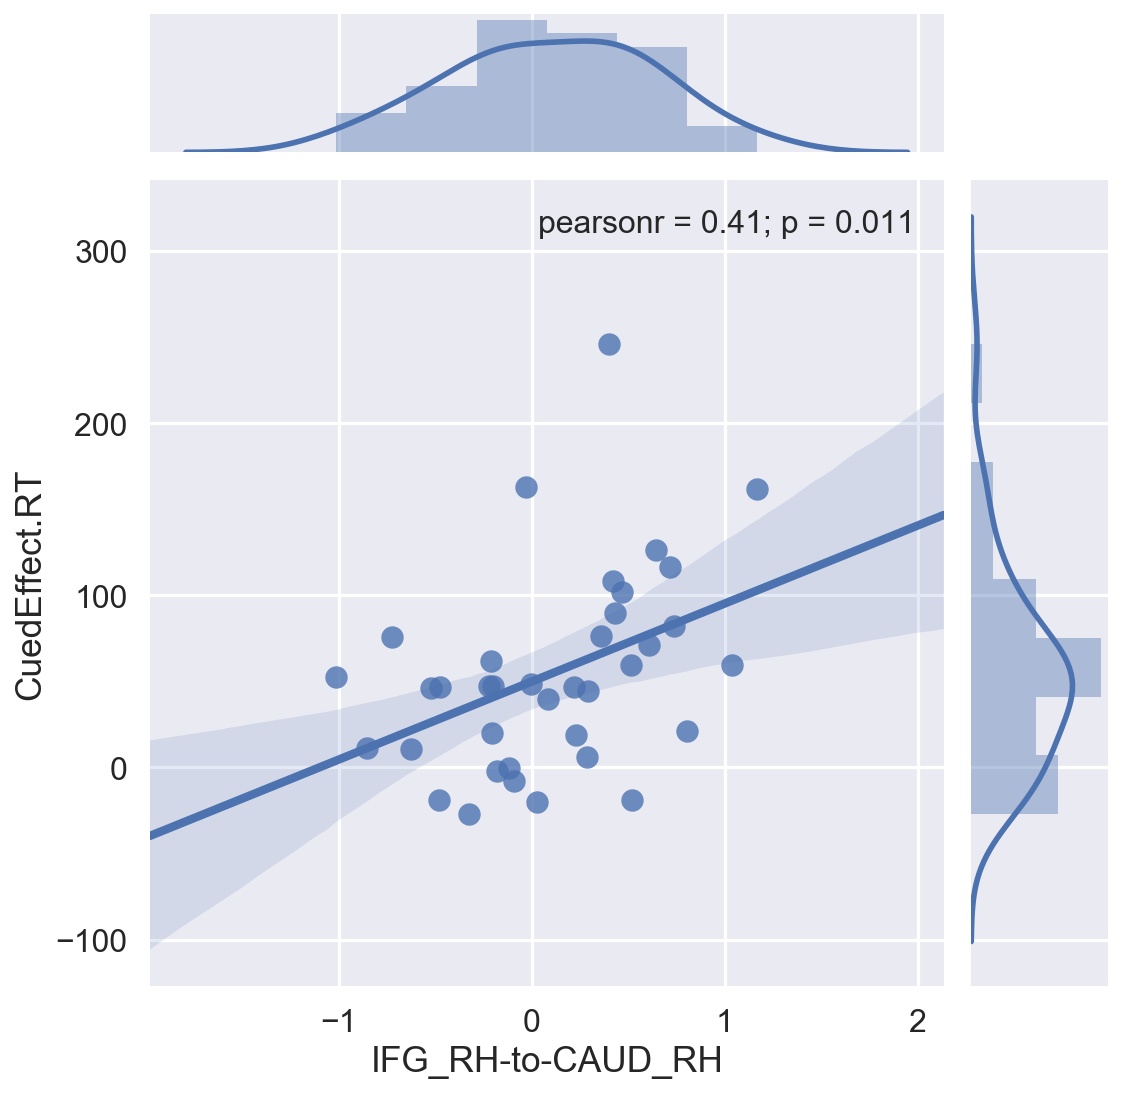

In [179]:
fig = sns.jointplot(x='IFG_RH-to-CAUD_RH', 
                    y='CuedEffect.RT', 
                    data=a.merge(bx), 
                    kind='reg', 
                    size=8)

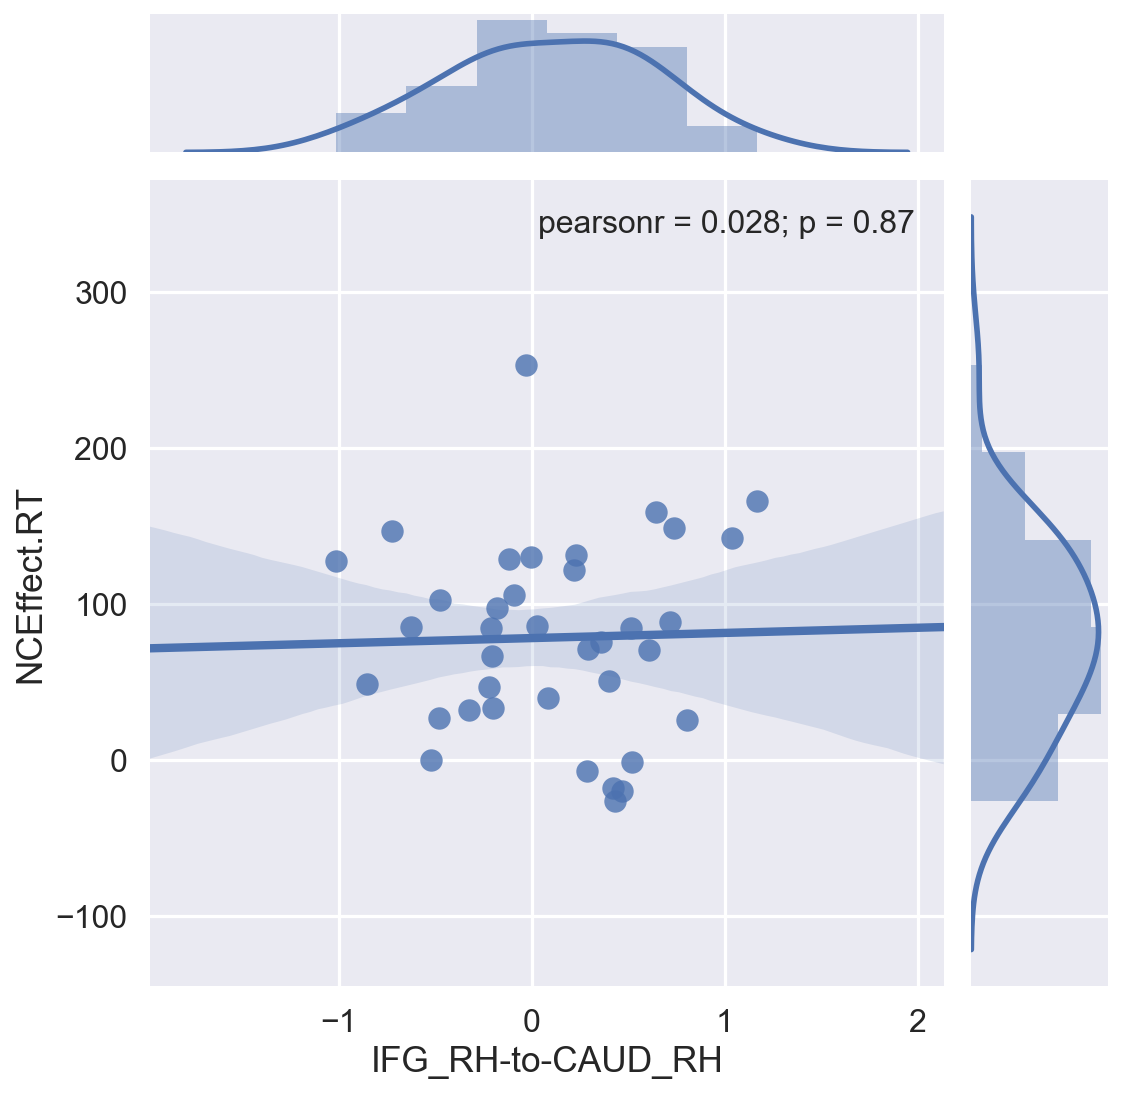

In [180]:
fig = sns.jointplot(x='IFG_RH-to-CAUD_RH', 
                    y='NCEffect.RT', 
                    data=a.merge(bx), 
                    kind='reg', 
                    size=8)

In [173]:
df1 = a.merge(bx).iloc[:, 8:]
df2 = a.merge(bx).iloc[:, 1:8]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [174]:
print('\nTable of Correlation Coefficients:')
dfCoeff


Table of Correlation Coefficients:


,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-GPI_RH,STN_RH-to-GPI_RH,GPI_RH-to-PRESMA_RH
CuedInc.RT,0.467919,0.084084,0.281676,-0.107091,0.054013,0.030434,0.043604
CuedInc.ACC,-0.112091,-0.163433,-0.025239,0.038497,0.083948,0.140337,-0.005041
CuedCon.RT,0.395322,0.037880,0.259811,-0.137088,0.008910,0.019587,0.105167
CuedCon.ACC,-0.101400,-0.275667,-0.142970,-0.009058,0.121322,-0.069255,-0.101710
NCInc.RT,0.338962,-0.029052,0.201472,-0.037325,0.049878,0.049661,-0.033967
NCInc.ACC,-0.089114,-0.202396,-0.168757,-0.059567,0.018459,-0.094076,0.020110
NCCon.RT,0.349474,-0.052588,0.213216,-0.189528,0.082423,-0.032728,0.014925
NCCon.ACC,-0.130924,-0.130042,-0.064584,0.125072,-0.244809,-0.069001,0.125584
Overall.ACC,-0.157148,-0.281398,-0.153846,0.026697,-0.010110,-0.041005,0.019426
CuedEffect.RT,0.412027,0.137257,0.206396,-0.005431,0.117578,0.038476,-0.091877


In [175]:
print('\nTable of p-values for Correlations:')
dfPvals


Table of p-values for Correlations:


,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-GPI_RH,STN_RH-to-GPI_RH,GPI_RH-to-PRESMA_RH
CuedInc.RT,0.003496,0.620753,0.091229,0.528125,0.750860,0.858089,0.797757
CuedInc.ACC,0.508928,0.333782,0.882126,0.821032,0.621316,0.407416,0.976375
CuedCon.RT,0.015449,0.823855,0.120440,0.418467,0.958261,0.908395,0.535605
CuedCon.ACC,0.550399,0.098650,0.398585,0.957565,0.474430,0.683793,0.549172
NCInc.RT,0.040144,0.864470,0.231793,0.826398,0.769394,0.770373,0.841811
NCInc.ACC,0.599929,0.229614,0.318057,0.726182,0.913650,0.579694,0.905957
NCCon.RT,0.033992,0.757233,0.205134,0.261222,0.627692,0.847512,0.930135
NCCon.ACC,0.439889,0.443004,0.704124,0.460774,0.144199,0.684891,0.458925
Overall.ACC,0.352955,0.091562,0.363287,0.875368,0.952643,0.809584,0.909144
CuedEffect.RT,0.011279,0.417888,0.220344,0.974551,0.488272,0.821129,0.588624


#### Interim Summary:

# DDM
### DCM Matrix A: Intrinsic Connectivity

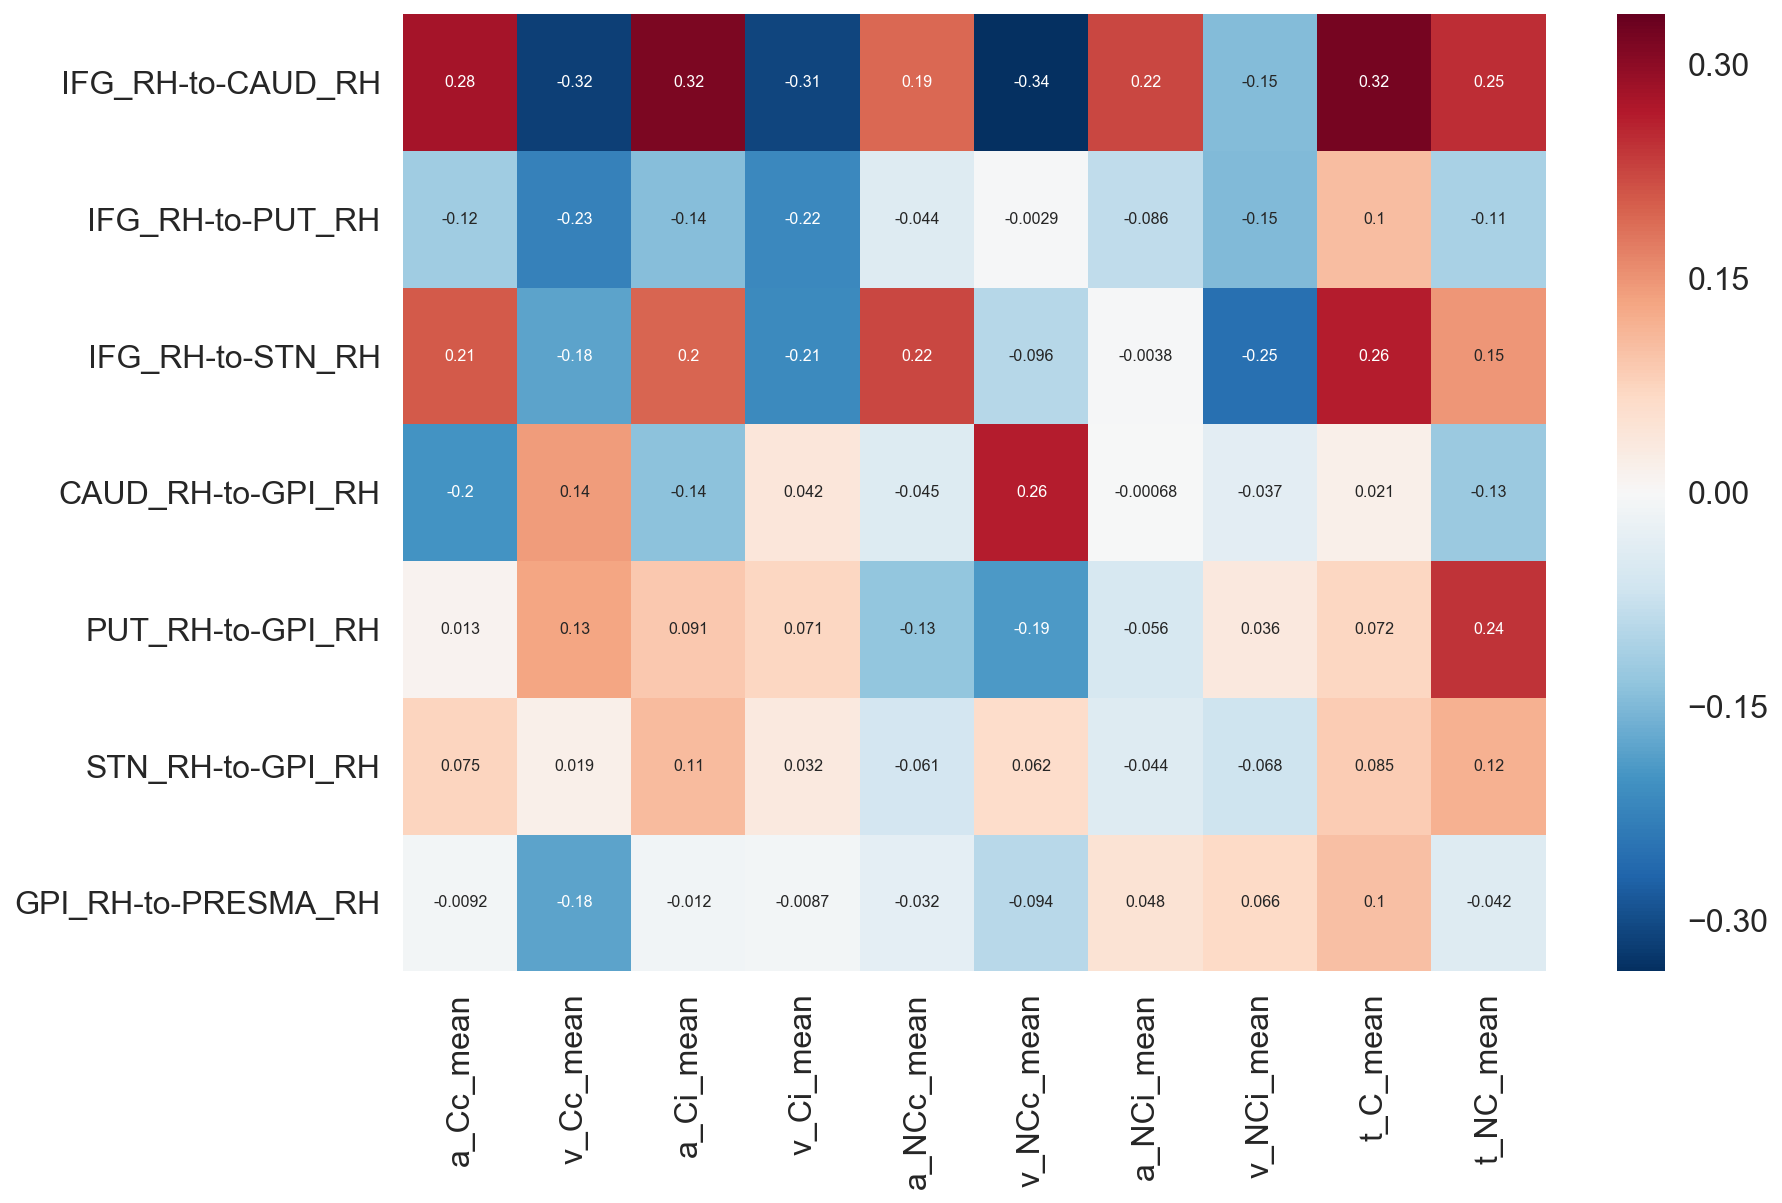

In [183]:
ax = sns.heatmap(a.merge(ddm).corr().iloc[1:8,8:], 
                 annot=True, 
                 annot_kws={'size':8})

In [186]:
aDDM = a.merge(ddm.melt(id_vars='Subject'), on='Subject')

aMeltDDMmelt = aMelt.merge(ddm.melt(id_vars='Subject'), on='Subject')
aMeltDDMmelt.head()

,Subject,variable_x,value_x,variable_y,value_y
0,16050,IFG_RH-to-CAUD_RH,0.516415,a_Cc_mean,1.192783
1,16050,IFG_RH-to-CAUD_RH,0.516415,v_Cc_mean,3.417405
2,16050,IFG_RH-to-CAUD_RH,0.516415,a_Ci_mean,1.792829
3,16050,IFG_RH-to-CAUD_RH,0.516415,v_Ci_mean,3.208320
4,16050,IFG_RH-to-CAUD_RH,0.516415,a_NCc_mean,1.480833


In [187]:
%%capture

for i in aMeltDDMmelt['variable_x'].unique():
    for j in aMeltDDMmelt['variable_y'].unique():
        fig = sns.jointplot(x='value_x', 
                            y='value_y', 
                            data=aMeltDDMmelt[(aMeltDDMmelt['variable_x'] == i) & (aMeltDDMmelt['variable_y'] == j)], 
                            kind='reg', 
                            size=10)

        fig.set_axis_labels(xlabel= i, ylabel= j)
        fig.savefig(i+j+'corr')